In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [4]:
tickers = ['^TNX',"^GSPC","UVXY","^VIX", "^DJI","^IXIC","KRE", "KGC"]

In [5]:
df = pd.DataFrame()

In [6]:
for t in tickers:
    df[t] = web.DataReader(t, data_source="yahoo", start ="2020-1-1")["Adj Close"]

In [7]:
df.corr()

,^TNX,^GSPC,UVXY,^VIX,^DJI,^IXIC,KRE,KGC
^TNX,1.000000,0.311651,-0.446010,-0.433395,0.479025,0.074281,0.782696,-0.567646
^GSPC,0.311651,1.000000,-0.884938,-0.711275,0.972712,0.953760,0.764206,0.456198
UVXY,-0.446010,-0.884938,1.000000,0.890844,-0.937018,-0.742466,-0.735924,-0.357248
^VIX,-0.433395,-0.711275,0.890844,1.000000,-0.793450,-0.537815,-0.594610,-0.299740
^DJI,0.479025,0.972712,-0.937018,-0.793450,1.000000,0.860049,0.839940,0.317824
^IXIC,0.074281,0.953760,-0.742466,-0.537815,0.860049,1.000000,0.610480,0.581381
KRE,0.782696,0.764206,-0.735924,-0.594610,0.839940,0.610480,1.000000,-0.183573
KGC,-0.567646,0.456198,-0.357248,-0.299740,0.317824,0.581381,-0.183573,1.000000


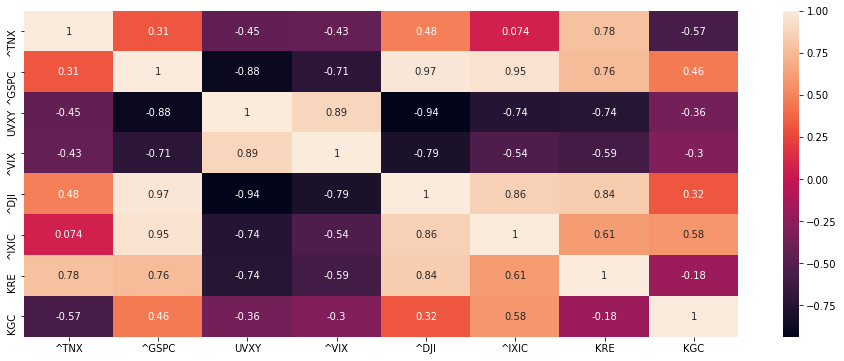

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

## Getting Daily returns for each column 

In [10]:
for x in df.columns:
    df[f"{x} returns"] = df[f"{x}"].pct_change()

##  Cooertation Analysis 
- Appears that the capital markets re coorelated to the 10 Year Yield
- Volatlity and Gold s inversly coorelated to the 10 year
- Lets see what indicatiors we can discover in the data

### KRE - SPDR S&P Regional Banking Fund
- Will run an analysis of this ETF and its coorelation to the Volatility market
- Appears that there is a Stron inverse coorelation between KRE and UVXY
- We can put the daily returns of KRE against against UVXY to set an indicator of when KRE will show gains and vice versa

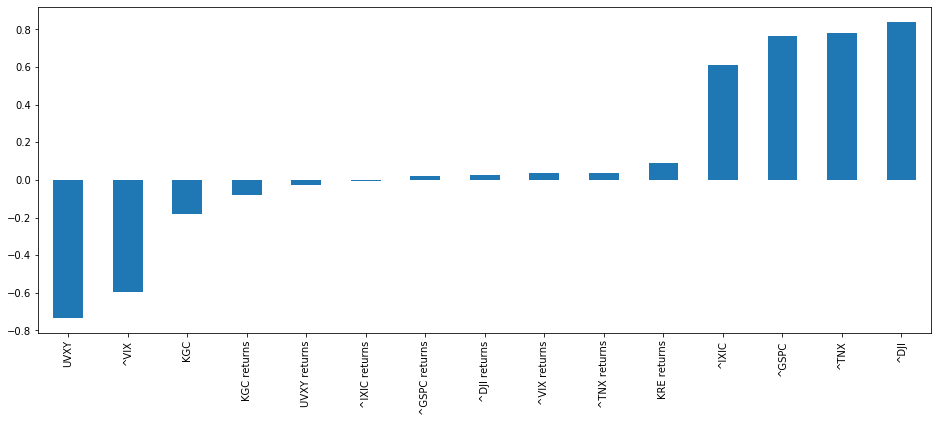

In [13]:
df.corrwith(df["KRE"]).sort_values()[:-1].plot(kind = "bar", figsize = (16,6))

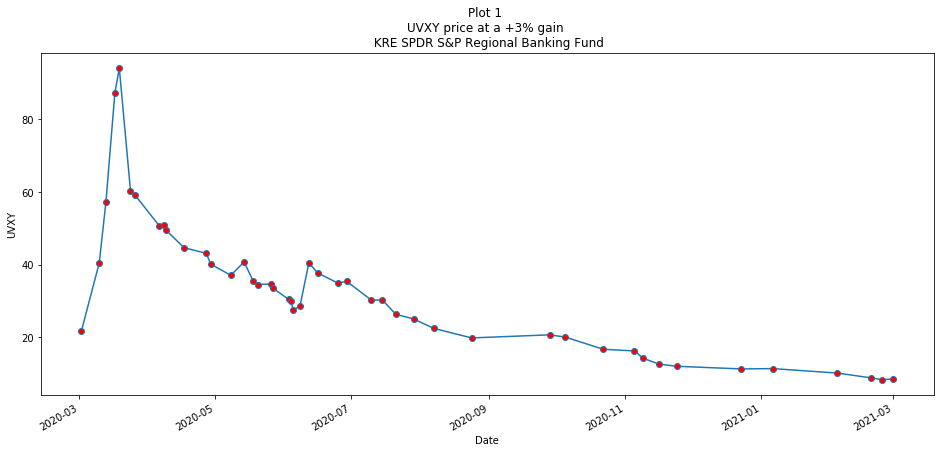

In [65]:
df[df["KRE returns"] *  100 > 3]["UVXY"].plot(figsize = (16,7), marker = "o", mfc = "r")
plt.title("Plot 1 \nUVXY price at a +3% gain \n KRE SPDR S&P Regional Banking Fund")
plt.ylabel("UVXY")
plt.savefig("Plots/KRE_+3pct_vs_UVXY.png", dpi = 300)

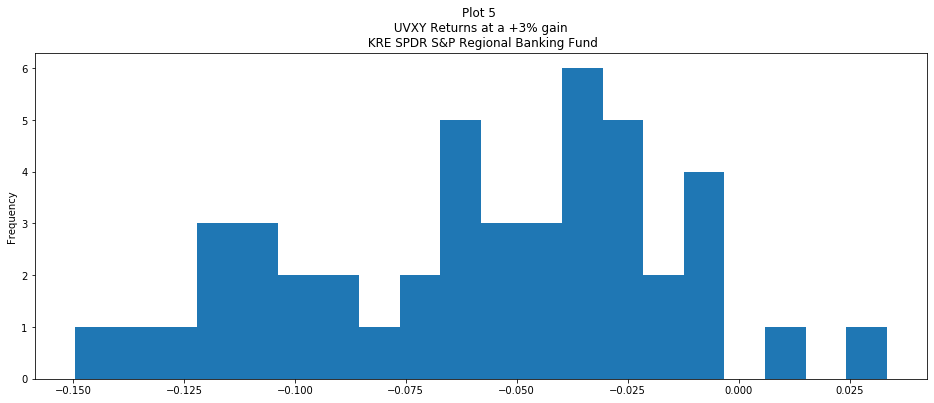

In [90]:
df[df["KRE returns"] *  100 > 3]["UVXY returns"].plot(kind = "hist", bins = 20, figsize = (16,6))
plt.title("Plot 5 \n UVXY Returns at a +3% gain \n KRE SPDR S&P Regional Banking Fund")
plt.savefig("Plots/uvxyandkre/RE_+3pct_vs_UVXY_hist.png", dpi = 300)

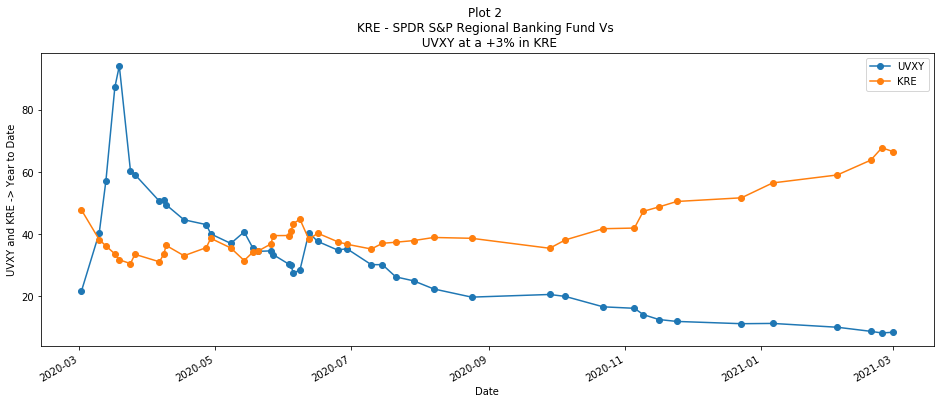

In [67]:
df[df["KRE returns"] *  100 > 3][["UVXY","KRE"]].plot(figsize = (16,6), marker = "o")
plt.title("Plot 2 \nKRE - SPDR S&P Regional Banking Fund Vs \n UVXY at a +3% in KRE")
plt.ylabel("UVXY and KRE -> Year to Date")
plt.savefig("Plots/uvxyandkre/kre_+3%_jointPlot_uvxy.png", dpi = 300)

### Scatter Plot
- WE will consider the returns for TNX in relation to UVXY and KRE
- This will give us an idea of what is also happening to the 10year as as KRE is up above 3%
- Lets create a dummy var for the gains(1) and losses(0) for the 10year

In [21]:
def get_dummies_for(value):
    if value < 0:
        return 0
    else:
        return 1

In [26]:
df["TNX returns hot"] = df["^TNX returns"].apply(lambda x: get_dummies_for(x))

In [46]:
df["GSPC hot"] = df["^GSPC returns"].apply(lambda x: get_dummies_for(x))

In [47]:
df.dropna(inplace=True)

### Plotting Scatter for KRE and UVXY on a GSPC return color scale
- Though there is th not too many points at the upper end of the value of KRE we can see that the ^GSPC show fewer days in the positive(1) 
- So as long as the long as KRE climbs in value we can expect fewer positive days in for the S&P 500

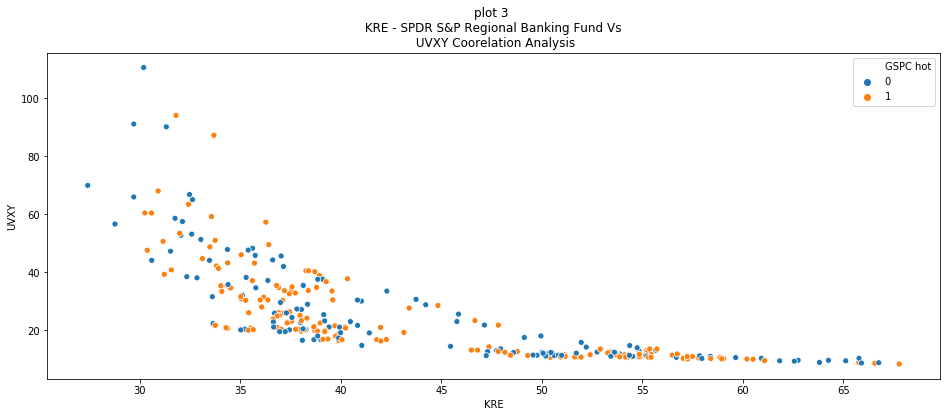

In [69]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df["KRE"], y = df["UVXY"], hue=df["GSPC hot"])
plt.title("plot 3 \n KRE - SPDR S&P Regional Banking Fund Vs \n UVXY Coorelation Analysis")
plt.savefig("Plots/uvxyandkre/kre_uvxy_coorelation_hueReturns_s&p.png", dpi = 300)

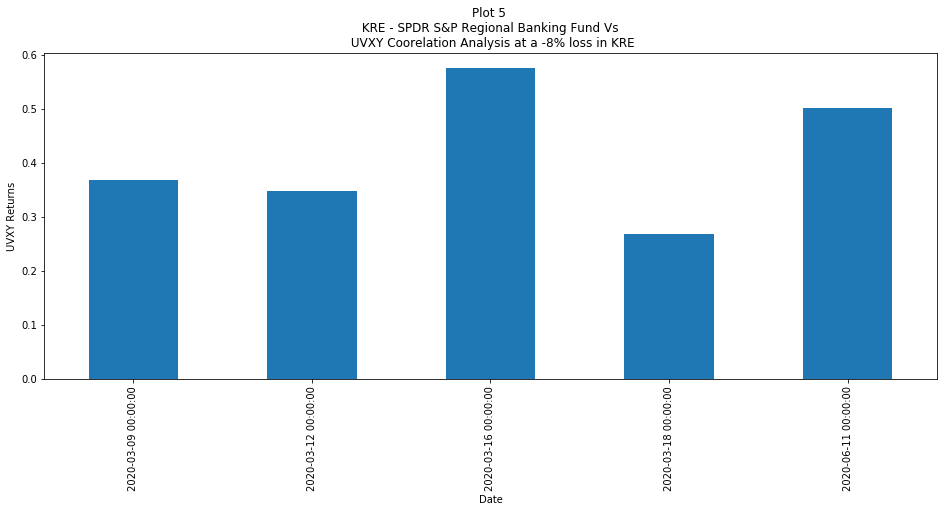

In [73]:
df[df["KRE returns"] *  100 < -8]["UVXY returns"].plot(kind = "bar", figsize = (16,6))
plt.title("Plot 5 \n KRE - SPDR S&P Regional Banking Fund Vs \n UVXY Coorelation Analysis at a -8% loss in KRE")
plt.ylabel('UVXY Returns')
plt.savefig("Plots/uvxyandkre/KRE_indicator_UVXY_Top2020days.png", dpi= 300)

In [92]:
df[df["KRE returns"] *  100 < -8]["UVXY returns"]

Date
2020-03-09    0.368311
2020-03-12    0.348403
2020-03-16    0.574773
2020-03-18    0.268256
2020-06-11    0.501648
Name: UVXY returns, dtype: float64

# TNX coorelation and indicator analysis

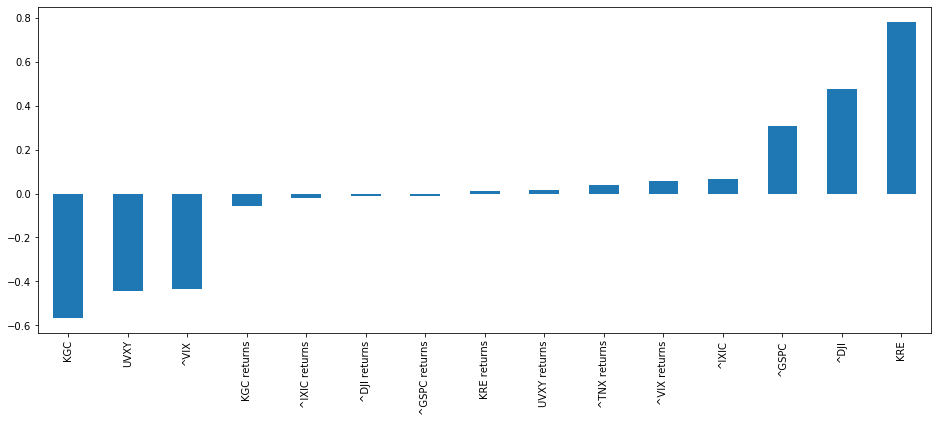

In [125]:
df.corrwith(df["^TNX"]).sort_values()[:-1].plot(figsize = (16,6), kind = "bar")

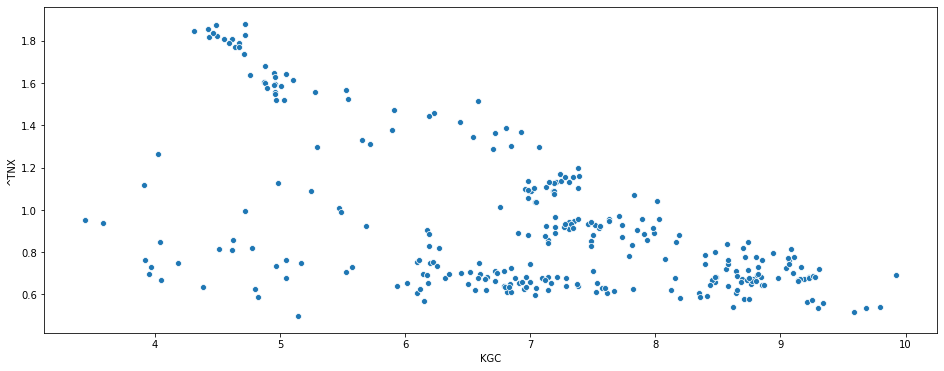

In [129]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df["KGC"], y = df["^TNX"])

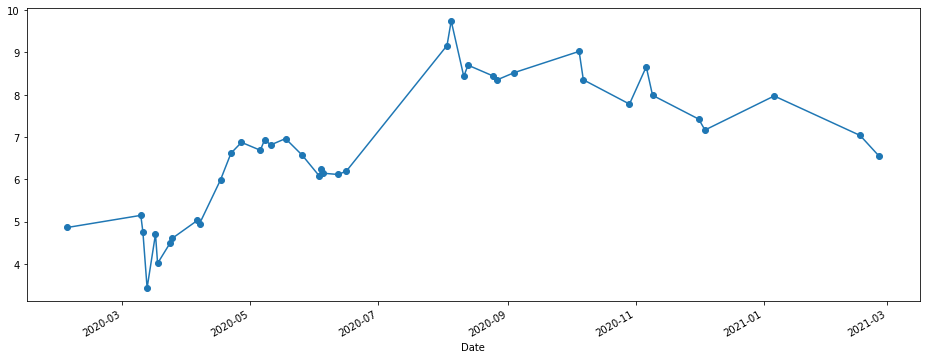

In [94]:
df[df["^TNX returns"] * 100 > 5]["KGC"].plot(figsize= (16,6), marker = "o")